## Organize Data

In [1]:
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
from sklearn.decomposition import PCA
import warnings   
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
import json
import pandas as pd
import requests
import random
import re
from scipy import spatial
from sklearn.manifold import TSNE

In [2]:
foods = pd.read_csv("foods.csv", delimiter=",", skipinitialspace=True)

# Get unique words
unique_words = foods["food_name"].unique()
query_words = list(unique_words) # list of words we will query
query_words = query_words[0:50]

print(len(query_words))
def make_query_string(blim, tlim):
    string = ""
    a = 0
    for word in query_words[blim:tlim]:
        a+=1
        word.replace(",", "")
        if a == len(query_words[blim:tlim]):
            string = string+word
        else:
            string = string+word+","
    return string

def make_all_query_strings():
    strings = []
    blim = 0
    tlim = 10
    a = False
    while tlim <= len(query_words):
        string = make_query_string(blim, tlim)
        strings.append(string)
        if a is True:
            return strings
        blim += 10
        tlim += 10
        if tlim >= len(query_words) and a == False:
            tlim = len(query_words)
            a = True
        print(a)
        

server_name = "http://localhost:5000"

def get_corpus():
    strings = make_all_query_strings()
    responses = []
    a = 0
    for string in strings:
        r = requests.get(server_name+"/recipes?queries={}&number=3".format(string))
        if r.status_code != 200:
            print("Error: {} - {}".format(r.status_code, r.text))
        else:
            print("Success")
        responses.append(r.json())
        print(a)
        a+=1
    return responses

50


In [37]:
corpus = get_corpus()

False
False
False
True
Success
0
Success
1
Success
2
Success
3
Success
4


In [38]:
# Save to JSON so that we don't have to query again
my_json = json.dumps(corpus)
with open("corpus0-50_3.json", "w") as f:
    json.dump(my_json, f)

In [4]:
paragraphs = []
for response in corpus: # for query word response
    for query in response:
        if query["corpus"] == "":
            continue
        else:
            paragraph = query["corpus"].lower() 
            sentences = re.split(r"[.!?]", paragraph)
            for sentence in sentences: 
                sentence = sentence.replace(",", "")
                nltk_tokens = word_tokenize(sentence)
                nltk_tokens = [word for word in nltk_tokens if len(word)>1 and word.isalpha()]
                paragraphs.append(nltk_tokens)

In [5]:
print(len(paragraphs))

82478


## CBOW Model

In [6]:
model_cbow = gensim.models.Word2Vec(paragraphs, min_count = 1, workers=8,  
                              size =100, window = 5) 

In [8]:
word1 = model_cbow["chicken"]
word2 = model_cbow["beef"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["chicken"]
word2 = model_cbow["pasta"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["chicken"]
word2 = model_cbow["cheese"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["chicken"]
word2 = model_cbow["salad"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["chicken"]
word2 = model_cbow["oats"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["milk"]
word2 = model_cbow["soup"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["onion"]
word2 = model_cbow["cookie"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["jalapenos"]
word2 = model_cbow["oats"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_cbow["pancake"]
word2 = model_cbow["swordfish"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

0.37708574533462524
0.5291062295436859
0.7096306085586548
0.8142939954996109
1.1466323286294937
0.9075531959533691
1.2905924320220947
0.8652362376451492
0.8586695790290833


## Skip Gram Comparison

In [9]:
model_sg = gensim.models.Word2Vec(paragraphs, min_count = 1, size = 100, workers=8,
                                             window = 5, sg = 1) 

In [11]:
word1 = model_sg["chicken"]
word2 = model_sg["beef"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["chicken"]
word2 = model_sg["pasta"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["chicken"]
word2 = model_sg["cheese"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["chicken"]
word2 = model_sg["salad"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["chicken"]
word2 = model_sg["oats"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["milk"]
word2 = model_sg["soup"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["onion"]
word2 = model_sg["cookie"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["jalapenos"]
word2 = model_sg["oats"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

word1 = model_sg["pancake"]
word2 = model_sg["swordfish"]
distance = spatial.distance.cosine(word1, word2)
print(distance)

0.3779314160346985
0.602798730134964
0.7371572554111481
0.6420902907848358
0.771724134683609
0.6541732251644135
0.8222979158163071
0.6327340304851532
0.6594221293926239


## Visual

In [12]:
labels = []
tokens = []
for w in list(model_cbow.wv.vocab):
    labels.append(w)
    tokens.append(model_cbow[w])
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

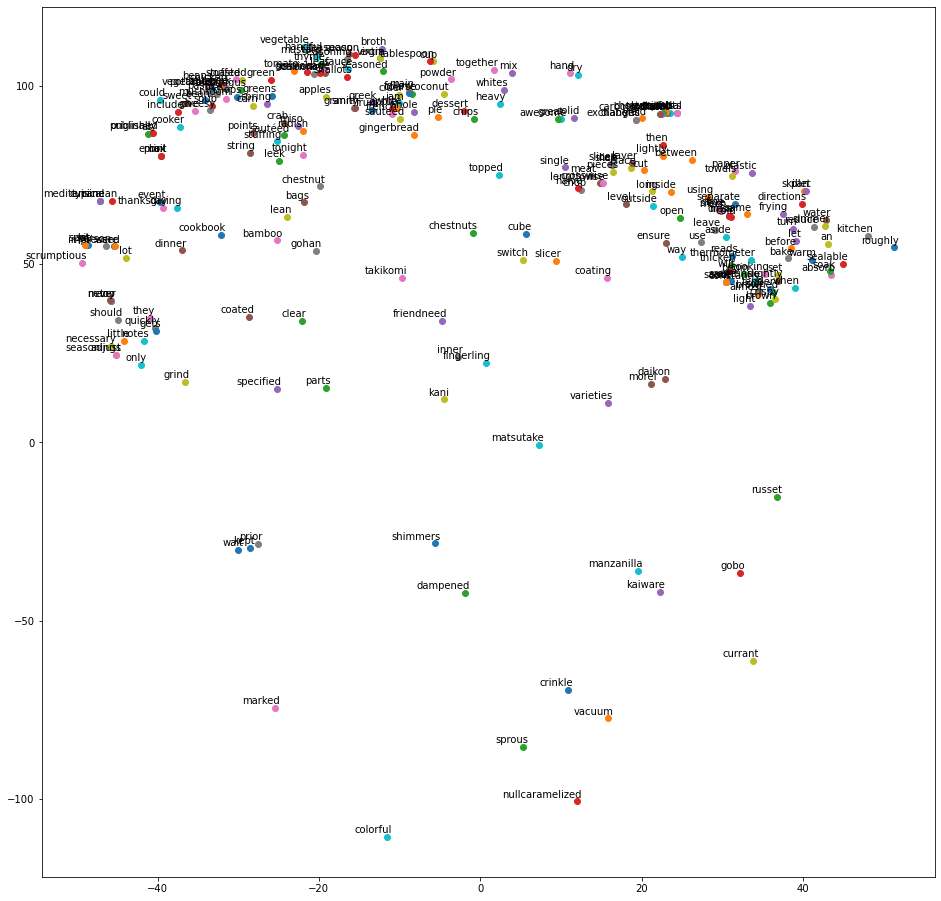

In [13]:
plt.figure(figsize=(16, 16)) 
for i in range(250, 500):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [71]:
labels = []
tokens = []
for w in list(model_sg.wv.vocab):
    labels.append(w)
    tokens.append(model_sg[w])
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

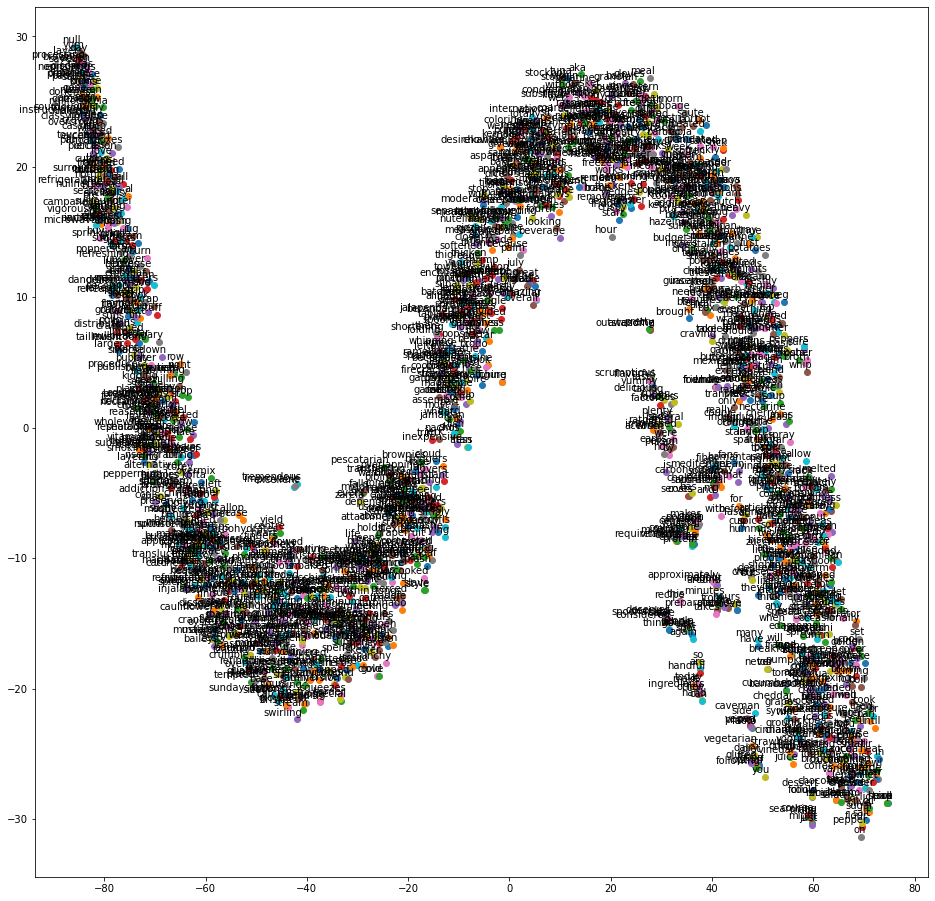

In [72]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()